In [1]:
%load_ext autoreload
import GCMPy as gp
%aimport GCMPy
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Import Peterson & Barney 1952 as pb52, convert to Bark

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1384,c,m,70,DRESS,1,235,657,2300,3300,2.340319,6.200673,13.944883,16.289962
1096,w,f,55,GOOSE,1,205,308,1025,2650,2.008591,3.110864,8.676114,14.881388
1030,w,f,52,PALM,1,163,766,1180,2340,1.528422,7.003551,9.545096,14.059628
2,m,m,1,KIT,1,203,390,2030,2640,1.986149,3.919319,13.110175,14.856609
664,w,f,34,DRESS,1,190,550,2200,2880,1.839256,5.344701,13.648365,15.423058


## Set some parameters

In [3]:
# set c, the sensitivity of exemplar cloud
cval=25

# set dimesnsions m as keys, 
    ## set weight of each dimension w_m as values
dimsvals={'z0':1,'z1':.761,'z2':.681,'z3':.407}
dimslist = list(dimsvals.keys())

# set categories to be considered as items in a list
catslist=['vowel','type']

# set the test set to be a copy of the exemplar cloud
test = pbbark.copy()

## Categorize exemplar cloud

In [4]:
# choices = gp.multicat(test,pbbark,catslist,dimsvals,cval,exclude_self=True, N=1)

### Generate confusion matrix

In [5]:
# gp.confusion(choices,["vowel"])

# Categorical perception stuff

In [27]:
datasumm = gp.datasummary(pbbark,catslist,dimslist)
start = {"type":"w","vowel":"KIT"}
end = {"type":"w","vowel":"DRESS"}
terms = {"vowel":["KIT","DRESS"]}
cont = gp.continuum(datasumm, end, start, dimslist, steps=7)

In [28]:
choices_cont = gp.multicat(cont,pbbark,catslist,dimsvals,cval,exclude_self=True,N=1,fc=terms)

In [29]:
bias_on="type"
typebias={"w":1,"m":500,"c":1}
mbias = gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias=typebias,exclude_self=True,fc=terms)

In [30]:
bias_on="type"
typebias={"w":1,"m":1,"c":500}
cbias= gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias=typebias,exclude_self=True,fc=terms)

In [31]:
bias_on="type"
typebias={"w":500,"m":1,"c":1}
wbias= gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias=typebias,exclude_self=True,fc=terms)

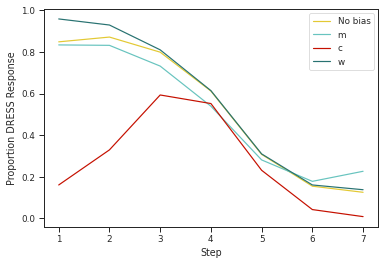

In [32]:
gp.cpplot([choices_cont,mbias,cbias,wbias],"vowel",["No bias","m","c","w"])